In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
plt.style.use('ggplot')
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',40)


/kaggle/input/classificacao-brasileirao-10-anos/Data Camp Brasileiro.xlsx
/kaggle/input/classificacao-brasileirao-10-anos/Data-Camp-Brasileiro_1.csv


In [8]:
df = pd.read_csv('/kaggle/input/classificacao-brasileirao-10-anos/Data-Camp-Brasileiro_1.csv',sep=";")

In [9]:
df.head()

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG
4,2009,5,Palmeiras,62,17,11,10,58,45,13,54.4,SP


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ANO             200 non-null    int64  
 1   Posicao         200 non-null    int64  
 2   Time            200 non-null    object 
 3   Pontos          200 non-null    int64  
 4   Vitoria         200 non-null    int64  
 5   Empates         200 non-null    int64  
 6   Derrotas        200 non-null    int64  
 7   Gols pro        200 non-null    int64  
 8   Gols Contra     200 non-null    int64  
 9   Saldo Gols      200 non-null    object 
 10  Aproveitamento  200 non-null    float64
 11  Estados         200 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 18.9+ KB


In [11]:
df.nunique()

ANO               10
Posicao           20
Time              36
Pontos            49
Vitoria           20
Empates           15
Derrotas          22
Gols pro          47
Gols Contra       47
Saldo Gols        76
Aproveitamento    73
Estados           10
dtype: int64

In [17]:
#campoes por ano

campeoes = df[df['Posicao'] == 1][['ANO','Time']]
print(campeoes)

      ANO         Time
0    2009     Flamengo
20   2010   Fluminense
40   2011  Corinthians
60   2012   Fluminense
80   2013     Cruzeiro
100  2014     Cruzeiro
120  2015  Corinthians
140  2016    Palmeiras
160  2017  Corinthians
180  2018    Palmeiras


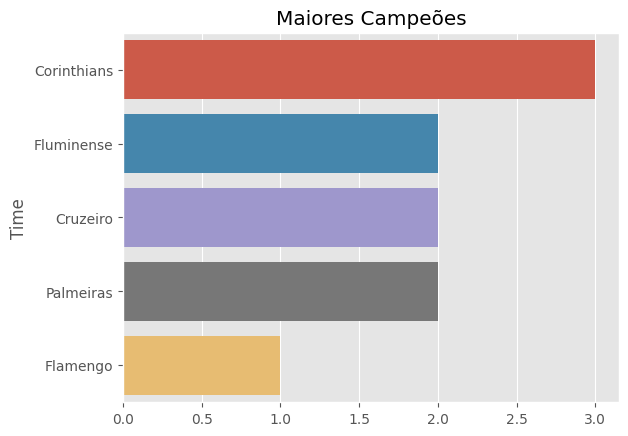

In [33]:
#maiores campeoes brasileiros durante o periodo do dataset
maiores_campeoes = campeoes['Time'].value_counts()
_ = sns.barplot(x=maiores_campeoes.values, y=maiores_campeoes.index)
_=plt.title('Maiores Campeões')
plt.show()


### **Análise Descritiva e de Ranking**

In [44]:
menor_ponto = df.groupby('Time')['Pontos'].sum().sort_values(ascending=True)
maior_ponto = df.groupby('Time')['Pontos'].sum().sort_values(ascending=False)

print('TIMES COM MENOR NUMERO DE PONTUAÇÃO DURANTE O DATASET')
print(menor_ponto)
print('TIMES COM MENOR NUMERO DE PONTUAÇÃO DURANTE O DATASET')
print(maior_ponto)

TIMES COM MENOR NUMERO DE PONTUAÇÃO DURANTE O DATASET
Time
Parana             23
Gremio Barueri     28
Santa Cruz PE      31
Joinville          31
Guarani            37
                 ... 
Flamengo          567
Sao Paulo         592
Cruzeiro          598
Gremio            612
Corinthians       619
Name: Pontos, Length: 36, dtype: int64
TIMES COM MENOR NUMERO DE PONTUAÇÃO DURANTE O DATASET
Time
Corinthians       619
Gremio            612
Cruzeiro          598
Sao Paulo         592
Flamengo          567
                 ... 
Guarani            37
Joinville          31
Santa Cruz PE      31
Gremio Barueri     28
Parana             23
Name: Pontos, Length: 36, dtype: int64


In [62]:
#descobrir a média de temporadas que os times jogaram a serie A
#esse corte será utilizado nas analises a seguir
temporadas_por_times = df.groupby('Time')['ANO'].count()
media_temporadas = temporadas_por_times.mean()
corte_times = temporadas_por_times >= media_temporadas
times_para_analisar = temporadas_por_times[corte_times]
lista_times_filtrados = times_para_analisar.index



In [75]:
df_times_filtrados = df['Time'].isin(lista_times_filtrados)
df_filtrado = df[df_times_filtrados]
lista_gols_pro = df_filtrado.groupby('Time')['Gols pro'].mean().sort_values(ascending=False)
print('Ranking de Média de Gols Pro')
print(lista_gols_pro)

Ranking de Média de Gols Pro
Time
Atletico MG      55.444444
Santos           52.500000
Cruzeiro         52.300000
Sao Paulo        51.600000
Palmeiras        51.444444
Gremio           51.400000
Fluminense       50.300000
Corinthians      49.800000
Internacional    49.222222
Flamengo         49.100000
Botafogo         47.777778
Vitoria          46.571429
Athletico PR     45.666667
Coritiba         44.500000
Sport            43.714286
Vasco            43.428571
Bahia            39.500000
Name: Gols pro, dtype: float64


In [77]:
df_times_filtrados = df['Time'].isin(lista_times_filtrados)
df_filtrado = df[df_times_filtrados]
lista_gols_contras = df_filtrado.groupby('Time')['Gols Contra'].mean().sort_values(ascending=True)
print('Ranking de Média de Gols Contras')
print(lista_gols_contras)

Ranking de Média de Gols Contras
Time
Corinthians      36.100000
Gremio           37.700000
Internacional    41.000000
Sao Paulo        42.500000
Cruzeiro         42.500000
Santos           42.800000
Flamengo         42.900000
Palmeiras        43.777778
Athletico PR     44.444444
Bahia            44.500000
Fluminense       45.800000
Botafogo         46.111111
Coritiba         48.250000
Vasco            48.428571
Atletico MG      49.111111
Sport            54.428571
Vitoria          55.142857
Name: Gols Contra, dtype: float64


In [78]:
df_times_filtrados = df['Time'].isin(lista_times_filtrados)
df_filtrado = df[df_times_filtrados]
lista_aproveitamento = df_filtrado.groupby('Time')['Aproveitamento'].mean().sort_values(ascending=False)
print('Ranking de Média de Aproveitamento')
print(lista_aproveitamento)

Ranking de Média de Aproveitamento
Time
Corinthians      54.170000
Gremio           53.560000
Cruzeiro         52.410000
Sao Paulo        51.960000
Internacional    51.000000
Atletico MG      50.722222
Flamengo         50.090000
Palmeiras        49.744444
Santos           49.230000
Fluminense       48.340000
Athletico PR     47.055556
Botafogo         46.077778
Vasco            44.957143
Coritiba         41.462500
Bahia            40.266667
Sport            39.657143
Vitoria          38.971429
Name: Aproveitamento, dtype: float64


### **ANALISE TEMPORAL**



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


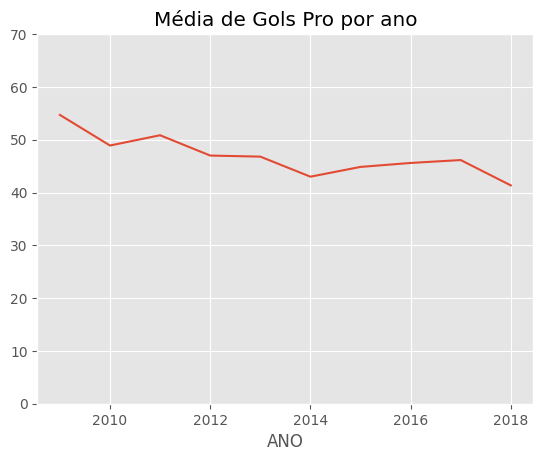

In [96]:
#analisando a média de gols feitos e tomados por ano 
media_gols_por_ano = df.groupby('ANO')['Gols pro'].mean()
_ = sns.lineplot(x=media_gols_por_ano.index, y=media_gols_por_ano.values)
_ = plt.title('Média de Gols Pro por ano')
_ = plt.ylim(0,70)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


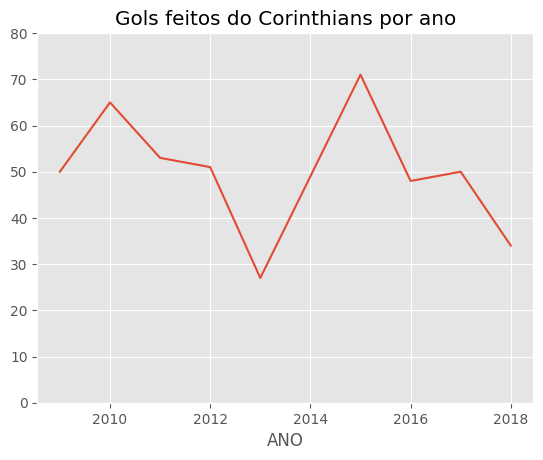

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


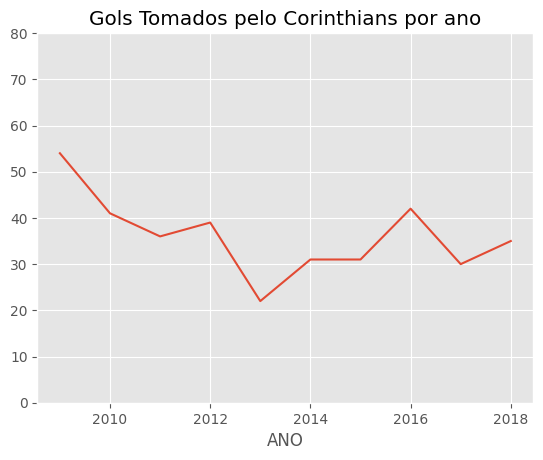

In [105]:
#analise de um time especifico (peguei o corinthians por ser corinthiano)

corinthians = df_corinthians = df[df['Time'] == 'Corinthians']
media_gols_corinthians = corinthians.groupby('ANO')['Gols pro'].mean()
_ = sns.lineplot(x=media_gols_corinthians.index, y=media_gols_corinthians.values)
_ = plt.title('Gols feitos do Corinthians por ano')
_ = plt.ylim(0,80)
plt.show()

#analise de um time especifico (peguei o corinthians por ser corinthiano)

corinthians = df_corinthians = df[df['Time'] == 'Corinthians']
media_gols_corinthians = corinthians.groupby('ANO')['Gols Contra'].mean()
_ = sns.lineplot(x=media_gols_corinthians.index, y=media_gols_corinthians.values)
_ = plt.title('Gols Tomados pelo Corinthians por ano')
_ = plt.ylim(0,80)
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


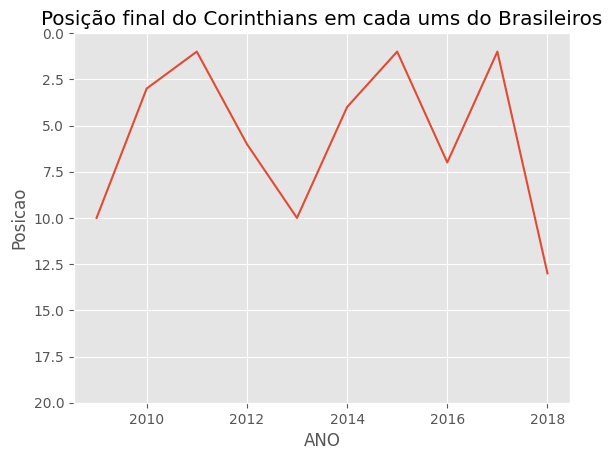

In [112]:
corinthians = df_corinthians = df[df['Time'] == 'Corinthians']

_ = sns.lineplot(x=corinthians['ANO'], y=corinthians['Posicao'])
_ = plt.title('Posição final do Corinthians em cada um dos campeonatos Brasileiros')
_ = plt.ylim(0,20)
_ = plt.gca().invert_yaxis() #GRAFICO INVERTIDO POIS NESSE CASO É MELHOR ESTAR PROXIMO DO 0 DO QUE DO 20
plt.show()